<a href="https://colab.research.google.com/github/akshajasinghdixit04/projects/blob/main/HearSafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load dataset
data = pd.read_csv("Sound.csv")

# Display first few rows
data.head()


,audio_id,sound_type,duration_sec,intensity_level,environment,sampling_rate,target_label
0,AUD_001,Car_Horn,1.17,Medium,Office,44100,Car_Horn
1,AUD_002,Alarm,3.58,Low,Office,44100,Alarm
2,AUD_003,Alarm,2.19,Medium,Street,44100,Alarm
3,AUD_004,Alarm,2.23,High,Parking,44100,Alarm
4,AUD_005,Car_Horn,2.38,Medium,Parking,44100,Car_Horn


In [5]:
# Create label encoders
le_sound = LabelEncoder()
le_intensity = LabelEncoder()
le_environment = LabelEncoder()
le_target = LabelEncoder()

# Encode columns
data["sound_type"] = le_sound.fit_transform(data["sound_type"])
data["intensity_level"] = le_intensity.fit_transform(data["intensity_level"])
data["environment"] = le_environment.fit_transform(data["environment"])
data["target_label"] = le_target.fit_transform(data["target_label"])


In [6]:
X = data.drop(["audio_id", "target_label"], axis=1)
y = data["target_label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Model Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 8  0  0]
 [ 0 19  0]
 [ 0  0 13]]


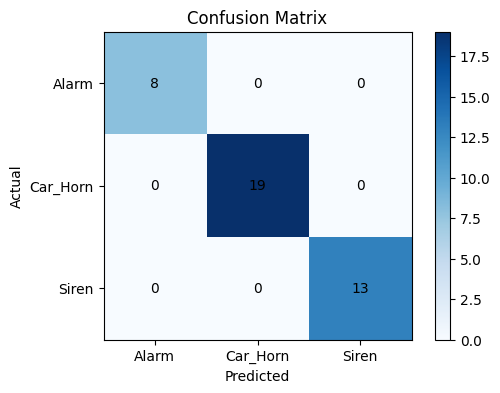

In [9]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

classes = le_target.classes_
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(classes)), classes)

plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [10]:
# Example new sound sample (manual input)
new_sample = pd.DataFrame({
    "sound_type": le_sound.transform(["Car_Horn"]),
    "duration_sec": [2.5],
    "intensity_level": le_intensity.transform(["High"]),
    "environment": le_environment.transform(["Road"]),
    "sampling_rate": [44100]
})

# Predict sound
prediction = model.predict(new_sample)
predicted_sound = le_target.inverse_transform(prediction)

print("🔊 Detected Sound:", predicted_sound[0])


🔊 Detected Sound: Car_Horn


In [11]:
if predicted_sound[0] == "Car_Horn":
    print("⚠️ ALERT: Vehicle horn detected! Please be careful.")
elif predicted_sound[0] == "Siren":
    print("🚨 ALERT: Emergency siren detected!")
elif predicted_sound[0] == "Alarm":
    print("⏰ ALERT: Alarm sound detected!")


⚠️ ALERT: Vehicle horn detected! Please be careful.
